In [18]:
# Import necessary libraries for analysis and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [3]:
# Load the processed reviews data
df_reviews = pd.read_csv('../data/processed_reviews_all_banks.csv')

# Show the first few rows to inspect the data
df_reviews.head()


,review,rating,date,bank,source,vader_sentiment,vader_sentiment_label,theme
0,bayeegar,5,2025-08-15,CBE,Google Play,0.0000,neutral,Theme 2
1,አሪፋ ነዉ ነገር ግን Recent Transaction በጣም የቆየዉን ነዉ ...,2,2025-08-15,CBE,Google Play,0.3182,positive,Theme 2
2,congra ethio,5,2025-08-15,CBE,Google Play,0.0000,neutral,Theme 2
3,እንዲሁ ነው የሰተኋችሁ ለሞራል,5,2025-08-15,CBE,Google Play,0.0000,neutral,Theme 2
4,nice,3,2025-08-14,CBE,Google Play,0.4215,positive,Theme 2


In [4]:
# Check the structure and summary of the dataset
df_reviews.info()

# Check for missing values
df_reviews.isnull().sum()

# Display unique values for sentiment labels to ensure consistency
df_reviews['vader_sentiment_label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review                 1009 non-null   object 
 1   rating                 1009 non-null   int64  
 2   date                   1009 non-null   object 
 3   bank                   1009 non-null   object 
 4   source                 1009 non-null   object 
 5   vader_sentiment        1009 non-null   float64
 6   vader_sentiment_label  1009 non-null   object 
 7   theme                  1009 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 63.2+ KB


vader_sentiment_label
positive    592
neutral     265
negative    152
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

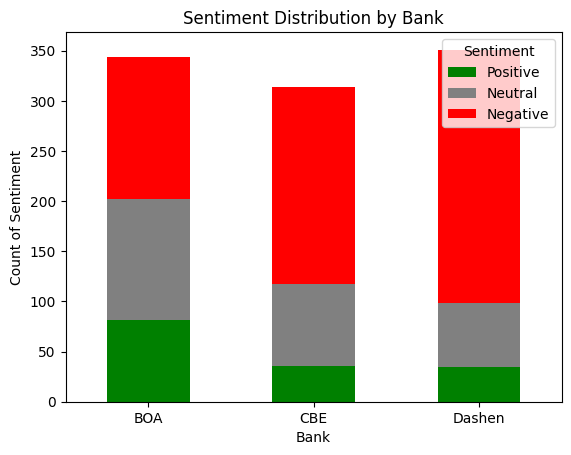

vader_sentiment_label,negative,neutral,positive
bank,,,
BOA,81,121,142
CBE,36,81,197
Dashen,35,63,253


In [5]:
# Sentiment distribution per bank
sentiment_by_bank = df_reviews.groupby('bank')['vader_sentiment_label'].value_counts().unstack().fillna(0)

# Plot the sentiment distribution by bank
plt.figure(figsize=(12, 6))
sentiment_by_bank.plot(kind='bar', stacked=True, color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Count of Sentiment')
plt.xticks(rotation=0)
plt.legend(title="Sentiment", labels=['Positive', 'Neutral', 'Negative'])
plt.show()

# Display the numerical sentiment distribution
sentiment_by_bank


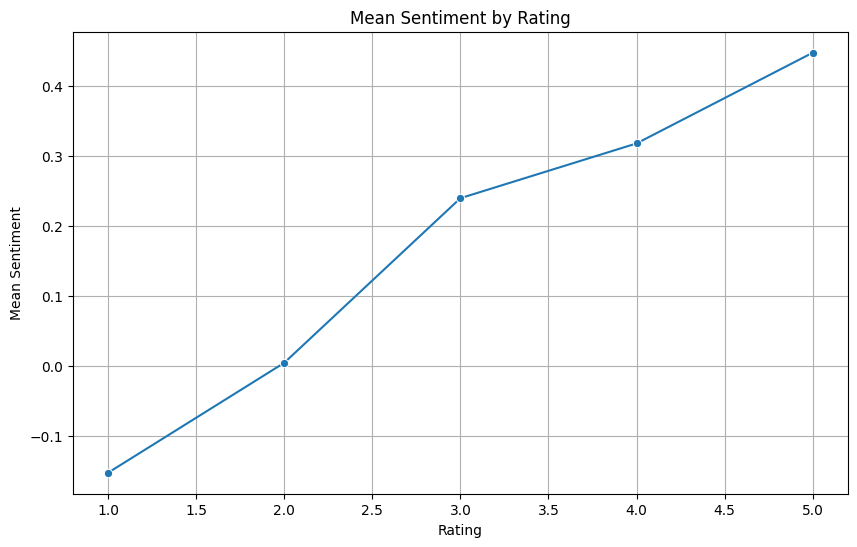

rating
1   -0.152215
2    0.004819
3    0.239953
4    0.318166
5    0.447753
Name: vader_sentiment, dtype: float64

In [6]:
# Calculate the mean sentiment by rating for better insights
sentiment_mean_by_rating = df_reviews.groupby('rating')['vader_sentiment'].mean()

# Plot the mean sentiment by rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_mean_by_rating, marker='o')
plt.title('Mean Sentiment by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Sentiment')
plt.grid(True)
plt.show()

# Display the mean sentiment per rating
sentiment_mean_by_rating


C:\Users\Misirak\AppData\Local\Temp\ipykernel_2692\61913909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='rating', palette='viridis')


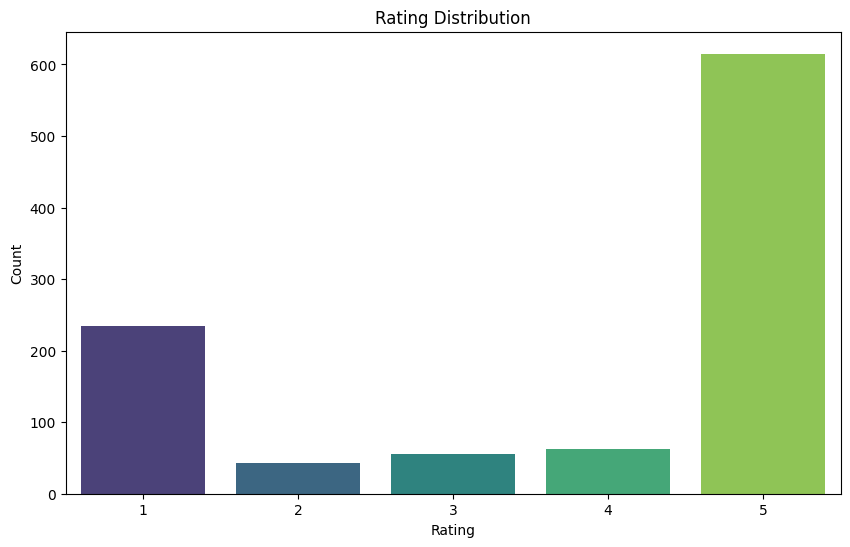

rating
1    234
2     43
3     55
4     62
5    615
Name: count, dtype: int64

In [7]:
# Plot rating distribution to understand user ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews, x='rating', palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Display the distribution of ratings
df_reviews['rating'].value_counts().sort_index()


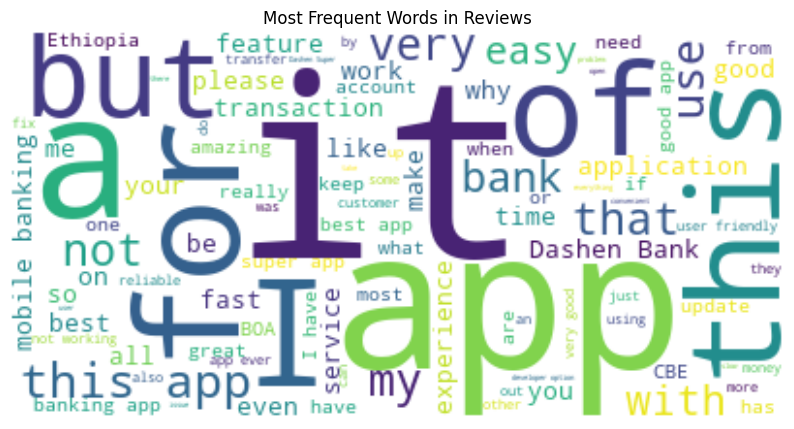

In [16]:
# Generate word cloud to visualize the most frequent themes or keywords in reviews
text = ' '.join(df_reviews['review'].dropna())  # Join all reviews into a single text

wordcloud = WordCloud(stopwords=['the', 'and', 'is', 'to', 'in'], background_color='white', max_words=100).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()


In [ ]:
# To improve clustering, let's create clusters based on themes (Using TF-IDF from Task 2)



# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=50)

# Fit the TF-IDF model and transform the reviews
X = vectorizer.fit_transform(df_reviews['review'])

# Use KMeans to cluster the reviews into themes
num_clusters = 3  # We aim for 3 themes based on previous analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get the top 10 terms for each cluster (theme)
terms = vectorizer.get_feature_names_out()
centroids = kmeans.cluster_centers_
themes = {}
for i in range(num_clusters):
    theme_keywords = [terms[ind] for ind in centroids[i].argsort()[-10:]]
    themes[f'Theme {i+1}'] = theme_keywords

# Display the themes
themes


{'Theme 1': ['experience',
  'good',
  'great',
  'banking',
  'bank',
  'mobile',
  'use',
  'app',
  'boa',
  'time'],
 'Theme 2': ['amazing',
  'like',
  'banking',
  'application',
  'use',
  'nice',
  'bank',
  'best',
  'good',
  'app'],
 'Theme 3': ['easy',
  'experience',
  'fast',
  'banking',
  'super app',
  'bank',
  'app',
  'dashen bank',
  'super',
  'dashen']}

C:\Users\Misirak\AppData\Local\Temp\ipykernel_2692\2428453803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='theme', palette='Set2')


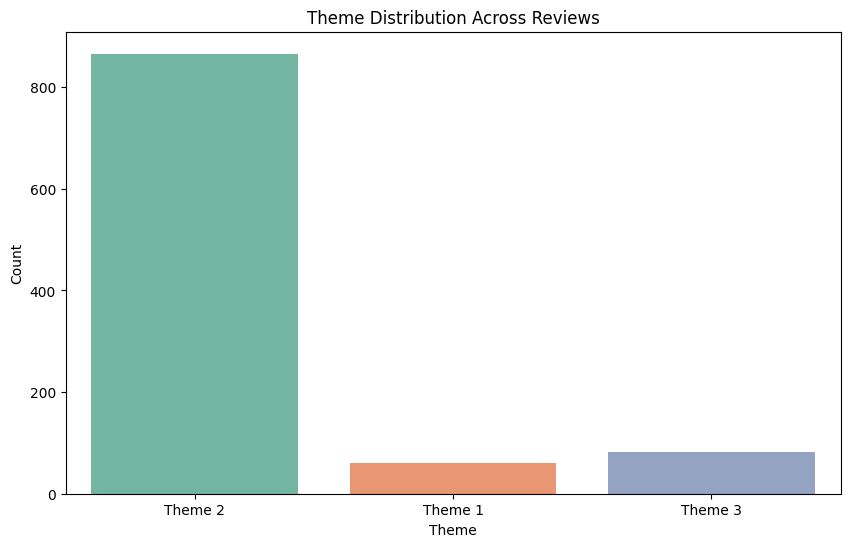

theme
Theme 2    866
Theme 3     82
Theme 1     61
Name: count, dtype: int64

In [11]:
# Plot the distribution of themes across reviews (Since themes are already assigned)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews, x='theme', palette='Set2')
plt.title('Theme Distribution Across Reviews')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.show()

# Display the theme counts
df_reviews['theme'].value_counts()


In [12]:
# Deriving key insights for each bank
insights = {}

for bank in df_reviews['bank'].unique():
    bank_data = df_reviews[df_reviews['bank'] == bank]
    sentiment_dist = bank_data['vader_sentiment_label'].value_counts(normalize=True)
    theme_dist = bank_data['theme'].value_counts(normalize=True)
    
    insights[bank] = {
        'Sentiment Distribution': sentiment_dist,
        'Theme Distribution': theme_dist
    }

# Display insights for each bank
insights


{'CBE': {'Sentiment Distribution': vader_sentiment_label
  positive    0.627389
  neutral     0.257962
  negative    0.114650
  Name: proportion, dtype: float64,
  'Theme Distribution': theme
  Theme 2    0.958599
  Theme 1    0.035032
  Theme 3    0.006369
  Name: proportion, dtype: float64},
 'BOA': {'Sentiment Distribution': vader_sentiment_label
  positive    0.412791
  neutral     0.351744
  negative    0.235465
  Name: proportion, dtype: float64,
  'Theme Distribution': theme
  Theme 2    0.880814
  Theme 1    0.116279
  Theme 3    0.002907
  Name: proportion, dtype: float64},
 'Dashen': {'Sentiment Distribution': vader_sentiment_label
  positive    0.720798
  neutral     0.179487
  negative    0.099715
  Name: proportion, dtype: float64,
  'Theme Distribution': theme
  Theme 2    0.746439
  Theme 3    0.225071
  Theme 1    0.028490
  Name: proportion, dtype: float64}}